In [1]:
import numpy as np
import extraction
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
dataset = pd.read_csv('phishing.csv')
X = dataset.iloc[:, 0:30].values
y = dataset.iloc[:, 30].values

In [3]:
dataset.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
list(dataset.columns)

['having_IP_Address',
 'URL_Length',
 'Shortining_Service',
 'having_At_Symbol',
 'double_slash_redirecting',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'Links_in_tags',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'Redirect',
 'on_mouseover',
 'RightClick',
 'popUpWidnow',
 'Iframe',
 'age_of_domain',
 'DNSRecord',
 'web_traffic',
 'Page_Rank',
 'Google_Index',
 'Links_pointing_to_page',
 'Statistical_report',
 'Result']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
X_train

array([[ 1, -1,  1, ...,  1,  1,  1],
       [ 1, -1,  1, ...,  1, -1,  1],
       [ 1, -1,  1, ...,  1,  1,  1],
       ..., 
       [-1,  1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       [ 1, -1,  1, ...,  1,  1,  1]], dtype=int64)

In [7]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
X_train

array([[ 0.72742047, -0.48353993,  0.38741472, ...,  0.40312158,
         1.14446209,  0.40856419],
       [ 0.72742047, -0.48353993,  0.38741472, ...,  0.40312158,
        -2.3491812 ,  0.40856419],
       [ 0.72742047, -0.48353993,  0.38741472, ...,  0.40312158,
         1.14446209,  0.40856419],
       ..., 
       [-1.37472073,  2.11046171,  0.38741472, ...,  0.40312158,
         1.14446209,  0.40856419],
       [-1.37472073, -0.48353993,  0.38741472, ...,  0.40312158,
         1.14446209,  0.40856419],
       [ 0.72742047, -0.48353993,  0.38741472, ...,  0.40312158,
         1.14446209,  0.40856419]])

In [9]:
print("Choose your algorithm: 1. KNN    2. Kernel SVM   3. Decision tree    4. Random Forest classifier")
algo = input()

Choose your algorithm: 1. KNN    2. Kernel SVM   3. Decision tree    4. Random Forest classifier
4


In [10]:
if(algo == '1'):
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
elif(algo == '2'):
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(X_train, y_train)
elif(algo == '3'):
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
elif(algo == '4'):
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
else:
    print("Invalid choice")
    exit()

In [11]:
new = []
x_input = input(print("Enter the url"))
new = extraction.generate_data_set(x_input)
new = np.array(new).reshape(1,-1)

Enter the url
Nonehttp://0x58.0xCC.0xCA.0x62/2/paypal.ca/index.html
[-1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1]


In [12]:
try:
    p = classifier.predict(new)
    if p== -1:
        print("phishing")
    else:
        print("legitimate")
except:
    print("phishing")

phishing


In [13]:
print('Accuracy score {0:.2f}%'.format(accuracy_score(y_test, classifier.predict(X_test))*100))

Accuracy score 96.82%


In [14]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [15]:
cm

array([[1187,   62],
       [  26, 1489]], dtype=int64)

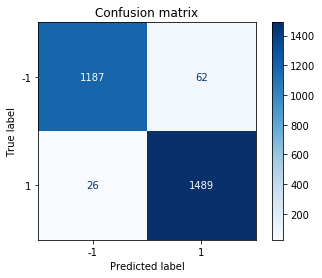

In [16]:
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix")
plt.show()
#plt.savefig('Confusion_matrix.png')

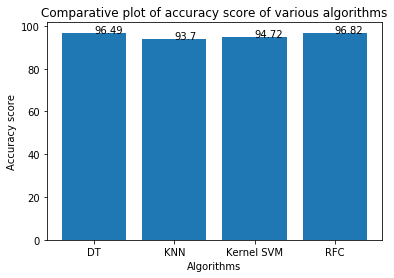

In [17]:
knn = 93.70
ksvm = 94.72 
dt = 96.49
rfc = 96.82
x = ['KNN','Kernel SVM','DT','RFC']
y = [knn,ksvm,dt,rfc]

line = plt.bar(x,y)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy score')
plt.title('Comparative plot of accuracy score of various algorithms')
for i in range(len(y)):
    plt.annotate(str(y[i]), xy = (x[i],y[i]))
plt.show()
#plt.savefig('accuracy score.png')
plt.close()

In [18]:
recall_score(y_test, classifier.predict(X_test))*100

98.28382838283828

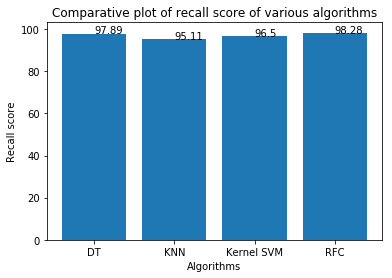

In [19]:
knn_recall = 95.11
ksvm_recall = 96.50
dt_recall = 97.89
rfc_recall = 98.28
x = ['KNN','Kernel SVM','DT','RFC']
y = [knn_recall,ksvm_recall,dt_recall,rfc_recall]

line = plt.bar(x,y)
plt.xlabel('Algorithms')
plt.ylabel('Recall score')
plt.title('Comparative plot of recall score of various algorithms')
for i in range(len(y)):
    plt.annotate(str(y[i]), xy = (x[i],y[i]))
plt.show()
#plt.savefig('recall score.png')
plt.close()

In [20]:
from sklearn.metrics import precision_score
precision_score(y_test, classifier.predict(X_test))*100

96.002578981302392

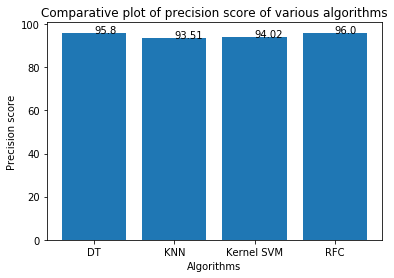

In [21]:
RFC_pre = 96.00
knn_pre = 93.51
ksvm_pre = 94.02
dt_pre = 95.80

x = ['KNN','Kernel SVM','DT','RFC']
y = [knn_pre,ksvm_pre,dt_pre,RFC_pre]

line = plt.bar(x,y)
plt.xlabel('Algorithms')
plt.ylabel('Precision score')
plt.title('Comparative plot of precision score of various algorithms')
for i in range(len(y)):
    plt.annotate(str(y[i]), xy = (x[i],y[i]))
plt.show()
#plt.savefig('precision score.png')
plt.close()

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, classifier.predict(X_test))*100

97.129810828440966

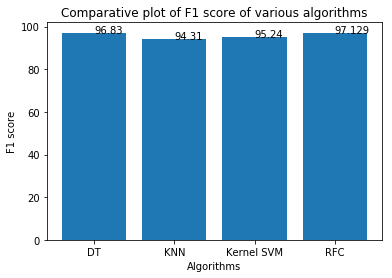

In [23]:
rcf_f1 = 97.129
knn_f1 = 94.31
ksvm_f1 = 95.24
dt_f1 = 96.83

x = ['KNN','Kernel SVM','DT','RFC']
y = [knn_f1,ksvm_f1,dt_f1,rcf_f1]

line = plt.bar(x,y)
plt.xlabel('Algorithms')
plt.ylabel('F1 score')
plt.title('Comparative plot of F1 score of various algorithms')
for i in range(len(y)):
    plt.annotate(str(y[i]), xy = (x[i],y[i]))
plt.show()
#plt.savefig('f1 score.png')
plt.close()